# Classification on MNIST Dataset
In this exercise, you will visualize the famous digits dataset, which includes thousands of scanned, handwritten digits and the label of the actual number. 

The task is to develop an algorithm that can correctly classify handwritten images. 
This task was one of the earliest successful examples of computer vision, and has been used as a benchmark of classification tasks every since.

Read more about this dataset [here](https://en.wikipedia.org/wiki/MNIST_database)

0


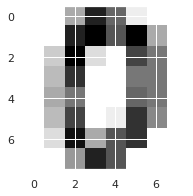

In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

#Load the digits dataset
digits = datasets.load_digits()

#Display the first digit
print(digits.target[0])
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [2]:
# This block converts code into the appropriate shape for visualization
# and splits the data into train/test split. 
# No changes are required. 
from sklearn.model_selection import train_test_split
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
data_train, data_test, target_train, target_test = train_test_split(
    data, digits.target, test_size=0.33, random_state=42)
print(data_train.shape,data_test.shape,target_train.shape,target_test.shape)

(1203, 64) (594, 64) (1203,) (594,)


### Part 1: Implement quadratic discriminant analysis. 
See reference [here](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis.html)

Note: we recommend you fill in the function `evaluate model` so you can reuse code for the next phases of this assignment. 
Also, you can find reference for the confusion matrix [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

In [6]:
# Here, fill in code to classify your data using QDA.
# Our recommendation is to output this data by completing the evaluate_model function,
# and then calling this on the trained classifier.
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import metrics
clf = QuadraticDiscriminantAnalysis()
clf.fit(data_train, target_train)
def evaluate_model(clf, X_train, X_test, Y_train, Y_test):
  """
  Prints score on train and test data, and prints the confusion matrix for each.
  """
  train_score = clf.score(X_train,Y_train)
  test_score = clf.score(X_test,Y_test)
  # train_confusion = <ADD CODE TO FIND TRAIN CONFUSION MATRIX>
  # test_confusion = <ADD CODE TO FIND TEST CONFUSION MATRIX>
  print("Score on training data: {}".format(train_score))
  # print(train_confusion)
  # sns.heatmap(train_confusion, annot=False, fmt=".3f", linewidths=.5, square = True, cmap = 'Reds');
  # plt.show();
  print("Score on test data: {}".format(test_score))
  # print(test_confusion)
  # sns.heatmap(test_confusion, annot=False, fmt=".3f", linewidths=.5, square = True, cmap = 'Reds');
  # plt.show();
evaluate_model(clf, data_train, data_test, target_train, target_test)
# clf.score(data_train, target_train)
# clf.score(data_test, target_test)

Score on training data: 0.9243557772236076
Score on test data: 0.8148148148148148


/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [10]:
print(clf.predict(data_train))
print(target_train)
np.mean(target_train == clf.predict(data_train))

[1 1 8 ... 2 7 1]
[1 1 8 ... 2 7 1]


0.9243557772236076

### Part 2: Support Vector Machine
Use a support vector machine with linear decision boundaries. See a reference [here](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html)

In [ ]:
# Here, add code to implement logistic regression and report the results. 
from sklearn.svm import LinearSVC
clf = <ADD CODE TO CREATE CLASSIFIER>
<ADD CODE TO TRAIN CLASSIFIER>
evaluate_model(clf, data_train, data_test, target_train, target_test)

### Part 3: SVM after PCA 
Read the reference [here](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html). 
Note: you should train PCA and the classifier on the training data and evaluate on the test data.

In [ ]:
# Here, add code to implement logistic regression and report the results. 
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
<ADD CODE TO TRAIN PCA>
train_transformed = <ADD CODE TO TRANSFORM YOUR DATA>
test_transformed  = <ADD CODE TO TRANSFORM YOUR DATA>
<ADD CODE TO CREATE CLASSIFIER>
<ADD CODE TO TRAIN CLASSIFIER>
evaluate_model(clf, train_transformed, test_transformed, target_train, target_test)

### Part 4: Logistic Regression
Implement logistic regression with the linear set of data features. 
Consider both penalized and unpenalized logistic regression - how does regularization affect the performance? 
See the reference [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)


In [11]:
# Here, add code to implement logistic regression and report the results. 
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0,penalty='none')
clf.fit(data_train,target_train)
evaluate_model(clf, data_train, data_test, target_train, target_test)

Score on training data: 1.0
Score on test data: 0.9595959595959596


### Part 5: Logistic Regression with Polynomial Expansion 
Implement logistic regression using a polynomial expansion of your data - that is, for each term $x$ of the original dataset, include the set of terms $\{x^1, x^2, \dots, x^k\}$ for some power $k$. 
Consider both penalized and unpenalized logistic regression - how does regularization affect the performance? 

In [ ]:
# Here, add code to take the polynomial transformation of the data
# and to evaluate a support vector machine on the data.
# Code to take the polynomial transformation is provided. 
from sklearn.linear_model import LogisticRegression
def polynomial_expansion(X, k):
  """
  returns the k-th order polynomial expansion of X
  """
  if k == 0: return np.ones(len(X))
  if k == 1: return X 
  to_return = X.copy()
  for i in range(2, k + 1):
    to_return = np.hstack([to_return, X ** k])
  return to_return 
train_transformed = <ADD CODE TO TRANSFORM YOUR DATA>
test_transformed  = <ADD CODE TO TRANSFORM YOUR DATA>
<ADD CODE TO CREATE CLASSIFIER>
<ADD CODE TO TRAIN CLASSIFIER>
evaluate_model(clf, train_transformed, test_transformed, target_train, target_test)